In [70]:
import numpy as np
import pandas as pd
import time
import requests
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials
from pandas_datareader import data
import edgar
import requests
from tqdm import tqdm
import pandas as pd
from bs4 import BeautifulSoup
import statsmodels.api as sm
from operator import itemgetter 
from scipy import stats
import urllib
import zipfile
from heapq import nsmallest 
from sec_edgar_downloader import Downloader

In [64]:
# gets tickers for sp 500
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
df.to_csv('S&P500-Info.csv')
df.to_csv("S&P500-Symbols.csv", columns=['Symbol'])


'MMM'

In [74]:
def convert_time(epoch):
    return time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(epoch))
    
epoch_time = int(time.time())
day_epoch = 60*60*24
tickers = df['Symbol']
days_back = 400
stocks = {}
for tick in tqdm(tickers):
    try:
        stock_data = data.DataReader(tick, 
                    start=convert_time(epoch_time - (days_back* day_epoch)), 
                    end=convert_time(epoch_time), 
                    data_source='yahoo')
        stocks[tick] = stock_data 
    except:
        print("Skipping stock for {}, bad data :<".format(tick))
    





  0%|                                                                                          | 0/505 [00:00<?, ?it/s]

MMM





  0%|▏                                                                                 | 1/505 [00:00<07:35,  1.11it/s]

ABT





  0%|▎                                                                                 | 2/505 [00:01<07:16,  1.15it/s]

ABBV





  1%|▍                                                                                 | 3/505 [00:02<06:44,  1.24it/s]

ABMD





  1%|▋                                                                                 | 4/505 [00:03<06:29,  1.29it/s]

ACN





  1%|▊                                                                                 | 5/505 [00:03<06:32,  1.27it/s]

ATVI





  1%|▉                                                                                 | 6/505 [00:04<06:21,  1.31it/s]

ADBE





  1%|█▏                                                                                | 7/505 [00:05<05:58,  1.39it/s]

AMD





  2%|█▎                                                                                | 8/505 [00:05<05:51,  1.41it/s]

AAP





  2%|█▍                                                                                | 9/505 [00:06<06:25,  1.29it/s]

AES





  2%|█▌                                                                               | 10/505 [00:07<06:36,  1.25it/s]

AFL





  2%|█▊                                                                               | 11/505 [00:08<06:23,  1.29it/s]

A





  2%|█▉                                                                               | 12/505 [00:09<06:58,  1.18it/s]

APD





  3%|██                                                                               | 13/505 [00:10<06:56,  1.18it/s]

AKAM





  3%|██▏                                                                              | 14/505 [00:11<07:00,  1.17it/s]

ALK





  3%|██▍                                                                              | 15/505 [00:11<06:45,  1.21it/s]

ALB





  3%|██▌                                                                              | 16/505 [00:13<07:35,  1.07it/s]

ARE





  3%|██▋                                                                              | 17/505 [00:13<07:20,  1.11it/s]

ALXN





  4%|██▉                                                                              | 18/505 [00:14<07:17,  1.11it/s]

ALGN





  4%|███                                                                              | 19/505 [00:15<06:26,  1.26it/s]

ALLE





  4%|███▏                                                                             | 20/505 [00:16<06:08,  1.32it/s]

LNT





  4%|███▎                                                                             | 21/505 [00:16<06:10,  1.31it/s]

ALL





  4%|███▌                                                                             | 22/505 [00:17<06:40,  1.21it/s]

GOOGL





  5%|███▋                                                                             | 23/505 [00:18<07:07,  1.13it/s]

GOOG





  5%|███▊                                                                             | 24/505 [00:19<07:18,  1.10it/s]

MO





  5%|████                                                                             | 25/505 [00:20<07:15,  1.10it/s]

AMZN





  5%|████▏                                                                            | 26/505 [00:21<06:33,  1.22it/s]

AMCR





  5%|████▎                                                                            | 27/505 [00:22<06:49,  1.17it/s]

AEE





  6%|████▍                                                                            | 28/505 [00:22<06:36,  1.20it/s]

AAL





  6%|████▋                                                                            | 29/505 [00:23<06:05,  1.30it/s]

AEP





  6%|████▊                                                                            | 30/505 [00:24<06:59,  1.13it/s]

AXP





  6%|████▉                                                                            | 31/505 [00:25<07:35,  1.04it/s]

AIG





  6%|█████▏                                                                           | 32/505 [00:26<07:04,  1.11it/s]

AMT





  7%|█████▎                                                                           | 33/505 [00:27<06:38,  1.19it/s]

AWK





  7%|█████▍                                                                           | 34/505 [00:28<06:30,  1.21it/s]

AMP





  7%|█████▌                                                                           | 35/505 [00:28<05:57,  1.32it/s]

ABC





  7%|█████▊                                                                           | 36/505 [00:29<06:34,  1.19it/s]

AME





  7%|█████▉                                                                           | 37/505 [00:30<06:20,  1.23it/s]

AMGN





  8%|██████                                                                           | 38/505 [00:31<06:41,  1.16it/s]

APH





  8%|██████▎                                                                          | 39/505 [00:32<06:45,  1.15it/s]

ADI





  8%|██████▍                                                                          | 40/505 [00:33<06:40,  1.16it/s]

ANSS





  8%|██████▌                                                                          | 41/505 [00:33<06:17,  1.23it/s]

ANTM





  8%|██████▋                                                                          | 42/505 [00:34<06:12,  1.24it/s]

AON





  9%|██████▉                                                                          | 43/505 [00:35<06:52,  1.12it/s]

AOS





  9%|███████                                                                          | 44/505 [00:36<06:27,  1.19it/s]

APA





  9%|███████▏                                                                         | 45/505 [00:37<06:53,  1.11it/s]

AIV





  9%|███████▍                                                                         | 46/505 [00:38<06:23,  1.20it/s]

AAPL





  9%|███████▌                                                                         | 47/505 [00:39<07:18,  1.04it/s]

AMAT





 10%|███████▋                                                                         | 48/505 [00:40<07:15,  1.05it/s]

APTV





 10%|███████▊                                                                         | 49/505 [00:41<07:09,  1.06it/s]

ADM





 10%|████████                                                                         | 50/505 [00:42<06:53,  1.10it/s]

ANET





 10%|████████▏                                                                        | 51/505 [00:43<06:37,  1.14it/s]

AJG





 10%|████████▎                                                                        | 52/505 [00:43<06:50,  1.10it/s]

AIZ





 10%|████████▌                                                                        | 53/505 [00:44<06:41,  1.13it/s]

T





 11%|████████▋                                                                        | 54/505 [00:45<06:32,  1.15it/s]

ATO





 11%|████████▊                                                                        | 55/505 [00:46<06:01,  1.25it/s]

ADSK





 11%|████████▉                                                                        | 56/505 [00:47<06:18,  1.19it/s]

ADP





 11%|█████████▏                                                                       | 57/505 [00:48<06:21,  1.17it/s]

AZO





 11%|█████████▎                                                                       | 58/505 [00:48<05:56,  1.25it/s]

AVB





 12%|█████████▍                                                                       | 59/505 [00:49<06:22,  1.17it/s]

AVY





 12%|█████████▌                                                                       | 60/505 [00:50<06:00,  1.24it/s]

BKR





 12%|█████████▊                                                                       | 61/505 [00:51<05:50,  1.27it/s]

BLL





 12%|█████████▉                                                                       | 62/505 [00:52<06:07,  1.21it/s]

BAC





 12%|██████████                                                                       | 63/505 [00:53<06:46,  1.09it/s]

BK





 13%|██████████▎                                                                      | 64/505 [00:53<06:08,  1.20it/s]

BAX





 13%|██████████▍                                                                      | 65/505 [00:54<06:35,  1.11it/s]

BDX





 13%|██████████▌                                                                      | 66/505 [00:56<07:24,  1.01s/it]

BRK.B





 13%|██████████▋                                                                      | 67/505 [00:56<06:10,  1.18it/s]

Skipping stock for BRK.B, bad data :<
BBY





 13%|██████████▉                                                                      | 68/505 [00:57<06:04,  1.20it/s]

BIO





 14%|███████████                                                                      | 69/505 [00:58<06:26,  1.13it/s]

BIIB





 14%|███████████▏                                                                     | 70/505 [00:59<06:27,  1.12it/s]

BLK





 14%|███████████▍                                                                     | 71/505 [01:00<06:02,  1.20it/s]

BA





 14%|███████████▌                                                                     | 72/505 [01:01<06:28,  1.11it/s]

BKNG





 14%|███████████▋                                                                     | 73/505 [01:01<06:02,  1.19it/s]

BWA





 15%|███████████▊                                                                     | 74/505 [01:02<06:14,  1.15it/s]

BXP





 15%|████████████                                                                     | 75/505 [01:03<06:11,  1.16it/s]

BSX





 15%|████████████▏                                                                    | 76/505 [01:11<22:01,  3.08s/it]

BMY





 15%|████████████▎                                                                    | 77/505 [01:12<17:25,  2.44s/it]

AVGO





 15%|████████████▌                                                                    | 78/505 [01:13<13:35,  1.91s/it]

BR





 16%|████████████▋                                                                    | 79/505 [01:14<10:44,  1.51s/it]

BF.B





 16%|████████████▊                                                                    | 80/505 [01:14<09:02,  1.28s/it]

Skipping stock for BF.B, bad data :<
CHRW





 16%|████████████▉                                                                    | 81/505 [01:15<07:41,  1.09s/it]

COG





 16%|█████████████▏                                                                   | 82/505 [01:16<07:27,  1.06s/it]

CDNS





 16%|█████████████▎                                                                   | 83/505 [01:17<06:54,  1.02it/s]

CPB





 17%|█████████████▍                                                                   | 84/505 [01:17<06:14,  1.12it/s]

COF





 17%|█████████████▋                                                                   | 85/505 [01:18<05:37,  1.24it/s]

CAH





 17%|█████████████▊                                                                   | 86/505 [01:19<05:33,  1.26it/s]

KMX





 17%|█████████████▉                                                                   | 87/505 [01:20<05:59,  1.16it/s]

CCL





 17%|██████████████                                                                   | 88/505 [01:21<05:47,  1.20it/s]

CARR





 18%|██████████████▎                                                                  | 89/505 [01:21<05:32,  1.25it/s]

CTLT





 18%|██████████████▍                                                                  | 90/505 [01:22<05:15,  1.32it/s]

CAT





 18%|██████████████▌                                                                  | 91/505 [01:23<05:10,  1.33it/s]

CBOE





 18%|██████████████▊                                                                  | 92/505 [01:24<05:21,  1.28it/s]

CBRE





 18%|██████████████▉                                                                  | 93/505 [01:24<05:22,  1.28it/s]

CDW





 19%|███████████████                                                                  | 94/505 [01:25<05:55,  1.16it/s]

CE





 19%|███████████████▏                                                                 | 95/505 [01:26<05:34,  1.23it/s]

CNC





 19%|███████████████▍                                                                 | 96/505 [01:27<05:07,  1.33it/s]

CNP





 19%|███████████████▌                                                                 | 97/505 [01:28<05:35,  1.22it/s]

CERN





 19%|███████████████▋                                                                 | 98/505 [01:28<05:17,  1.28it/s]

CF





 20%|███████████████▉                                                                 | 99/505 [01:29<05:07,  1.32it/s]

SCHW





 20%|███████████████▊                                                                | 100/505 [01:30<05:01,  1.34it/s]

CHTR





 20%|████████████████                                                                | 101/505 [01:31<05:15,  1.28it/s]

CVX





 20%|████████████████▏                                                               | 102/505 [01:31<04:50,  1.39it/s]

CMG





 20%|████████████████▎                                                               | 103/505 [01:32<05:04,  1.32it/s]

CB





 21%|████████████████▍                                                               | 104/505 [01:33<05:15,  1.27it/s]

CHD





 21%|████████████████▋                                                               | 105/505 [01:34<05:33,  1.20it/s]

CI





 21%|████████████████▊                                                               | 106/505 [01:35<05:31,  1.20it/s]

CINF





 21%|████████████████▉                                                               | 107/505 [01:36<05:31,  1.20it/s]

CTAS





 21%|█████████████████                                                               | 108/505 [01:37<05:55,  1.12it/s]

CSCO





 22%|█████████████████▎                                                              | 109/505 [01:38<06:02,  1.09it/s]

C





 22%|█████████████████▍                                                              | 110/505 [01:39<06:33,  1.00it/s]

CFG





 22%|█████████████████▌                                                              | 111/505 [01:40<06:23,  1.03it/s]

CTXS





 22%|█████████████████▋                                                              | 112/505 [01:41<06:47,  1.04s/it]

CLX





 22%|█████████████████▉                                                              | 113/505 [01:42<06:23,  1.02it/s]

CME





 23%|██████████████████                                                              | 114/505 [01:42<05:39,  1.15it/s]

CMS





 23%|██████████████████▏                                                             | 115/505 [01:43<05:30,  1.18it/s]

KO





 23%|██████████████████▍                                                             | 116/505 [01:44<05:31,  1.17it/s]

CTSH





 23%|██████████████████▌                                                             | 117/505 [01:45<05:22,  1.20it/s]

CL





 23%|██████████████████▋                                                             | 118/505 [01:46<05:13,  1.24it/s]

CMCSA





 24%|██████████████████▊                                                             | 119/505 [01:46<05:28,  1.18it/s]

CMA





 24%|███████████████████                                                             | 120/505 [01:47<05:15,  1.22it/s]

CAG





 24%|███████████████████▏                                                            | 121/505 [01:48<05:11,  1.23it/s]

CXO





 24%|███████████████████▎                                                            | 122/505 [01:49<05:12,  1.23it/s]

COP





 24%|███████████████████▍                                                            | 123/505 [01:50<05:24,  1.18it/s]

ED





 25%|███████████████████▋                                                            | 124/505 [01:51<05:49,  1.09it/s]

STZ





 25%|███████████████████▊                                                            | 125/505 [01:52<05:44,  1.10it/s]

COO





 25%|███████████████████▉                                                            | 126/505 [01:53<05:33,  1.14it/s]

CPRT





 25%|████████████████████                                                            | 127/505 [01:54<05:56,  1.06it/s]

GLW





 25%|████████████████████▎                                                           | 128/505 [01:54<05:33,  1.13it/s]

CTVA





 26%|████████████████████▍                                                           | 129/505 [01:55<05:27,  1.15it/s]

COST





 26%|████████████████████▌                                                           | 130/505 [01:56<05:00,  1.25it/s]

CCI





 26%|████████████████████▊                                                           | 131/505 [01:57<04:54,  1.27it/s]

CSX





 26%|████████████████████▉                                                           | 132/505 [01:58<05:26,  1.14it/s]

CMI





 26%|█████████████████████                                                           | 133/505 [01:59<06:23,  1.03s/it]

CVS





 27%|█████████████████████▏                                                          | 134/505 [02:00<05:58,  1.03it/s]

DHI





 27%|█████████████████████▍                                                          | 135/505 [02:01<05:32,  1.11it/s]

DHR





 27%|█████████████████████▌                                                          | 136/505 [02:01<05:12,  1.18it/s]

DRI





 27%|█████████████████████▋                                                          | 137/505 [02:02<04:49,  1.27it/s]

DVA





 27%|█████████████████████▊                                                          | 138/505 [02:03<05:05,  1.20it/s]

DE





 28%|██████████████████████                                                          | 139/505 [02:04<05:24,  1.13it/s]

DAL





 28%|██████████████████████▏                                                         | 140/505 [02:05<05:32,  1.10it/s]

XRAY





 28%|██████████████████████▎                                                         | 141/505 [02:06<04:56,  1.23it/s]

DVN





 28%|██████████████████████▍                                                         | 142/505 [02:06<04:40,  1.29it/s]

DXCM





 28%|██████████████████████▋                                                         | 143/505 [02:07<04:22,  1.38it/s]

FANG





 29%|██████████████████████▊                                                         | 144/505 [02:08<04:38,  1.30it/s]

DLR





 29%|██████████████████████▉                                                         | 145/505 [02:09<05:00,  1.20it/s]

DFS





 29%|███████████████████████▏                                                        | 146/505 [02:10<05:35,  1.07it/s]

DISCA





 29%|███████████████████████▎                                                        | 147/505 [02:11<05:39,  1.05it/s]

DISCK





 29%|███████████████████████▍                                                        | 148/505 [02:12<05:28,  1.09it/s]

DISH





 30%|███████████████████████▌                                                        | 149/505 [02:12<05:07,  1.16it/s]

DG





 30%|███████████████████████▊                                                        | 150/505 [02:13<05:25,  1.09it/s]

DLTR





 30%|███████████████████████▉                                                        | 151/505 [02:14<05:22,  1.10it/s]

D





 30%|████████████████████████                                                        | 152/505 [02:15<05:10,  1.14it/s]

DPZ





 30%|████████████████████████▏                                                       | 153/505 [02:16<04:58,  1.18it/s]

DOV





 30%|████████████████████████▍                                                       | 154/505 [02:17<04:47,  1.22it/s]

DOW





 31%|████████████████████████▌                                                       | 155/505 [02:17<04:33,  1.28it/s]

DTE





 31%|████████████████████████▋                                                       | 156/505 [02:18<04:33,  1.28it/s]

DUK





 31%|████████████████████████▊                                                       | 157/505 [02:20<05:47,  1.00it/s]

DRE





 31%|█████████████████████████                                                       | 158/505 [02:20<05:17,  1.09it/s]

DD





 31%|█████████████████████████▏                                                      | 159/505 [02:21<04:57,  1.16it/s]

DXC





 32%|█████████████████████████▎                                                      | 160/505 [02:22<04:47,  1.20it/s]

EMN





 32%|█████████████████████████▌                                                      | 161/505 [02:22<04:20,  1.32it/s]

ETN





 32%|█████████████████████████▋                                                      | 162/505 [02:23<04:15,  1.34it/s]

EBAY





 32%|█████████████████████████▊                                                      | 163/505 [02:24<04:58,  1.15it/s]

ECL





 32%|█████████████████████████▉                                                      | 164/505 [02:25<04:25,  1.28it/s]

EIX





 33%|██████████████████████████▏                                                     | 165/505 [02:26<04:12,  1.35it/s]

EW





 33%|██████████████████████████▎                                                     | 166/505 [02:26<04:17,  1.31it/s]

EA





 33%|██████████████████████████▍                                                     | 167/505 [02:27<04:20,  1.30it/s]

EMR





 33%|██████████████████████████▌                                                     | 168/505 [02:28<04:25,  1.27it/s]

ETR





 33%|██████████████████████████▊                                                     | 169/505 [02:29<05:27,  1.03it/s]

EOG





 34%|██████████████████████████▉                                                     | 170/505 [02:30<05:20,  1.05it/s]

EFX





 34%|███████████████████████████                                                     | 171/505 [02:31<05:24,  1.03it/s]

EQIX





 34%|███████████████████████████▏                                                    | 172/505 [02:32<05:04,  1.09it/s]

EQR





 34%|███████████████████████████▍                                                    | 173/505 [02:33<05:11,  1.07it/s]

ESS





 34%|███████████████████████████▌                                                    | 174/505 [02:34<05:08,  1.07it/s]

EL





 35%|███████████████████████████▋                                                    | 175/505 [02:35<05:00,  1.10it/s]

ETSY





 35%|███████████████████████████▉                                                    | 176/505 [02:35<04:20,  1.26it/s]

EVRG





 35%|████████████████████████████                                                    | 177/505 [02:36<04:23,  1.25it/s]

ES





 35%|████████████████████████████▏                                                   | 178/505 [02:37<04:35,  1.19it/s]

RE





 35%|████████████████████████████▎                                                   | 179/505 [02:38<04:48,  1.13it/s]

EXC





 36%|████████████████████████████▌                                                   | 180/505 [02:39<04:38,  1.17it/s]

EXPE





 36%|████████████████████████████▋                                                   | 181/505 [02:40<05:04,  1.06it/s]

EXPD





 36%|████████████████████████████▊                                                   | 182/505 [02:41<04:41,  1.15it/s]

EXR





 36%|████████████████████████████▉                                                   | 183/505 [02:41<04:18,  1.25it/s]

XOM





 36%|█████████████████████████████▏                                                  | 184/505 [02:42<04:30,  1.19it/s]

FFIV





 37%|█████████████████████████████▎                                                  | 185/505 [02:43<04:33,  1.17it/s]

FB





 37%|█████████████████████████████▍                                                  | 186/505 [02:44<04:30,  1.18it/s]

FAST





 37%|█████████████████████████████▌                                                  | 187/505 [02:45<04:25,  1.20it/s]

FRT





 37%|█████████████████████████████▊                                                  | 188/505 [02:46<04:10,  1.26it/s]

FDX





 37%|█████████████████████████████▉                                                  | 189/505 [02:46<03:47,  1.39it/s]

FIS





 38%|██████████████████████████████                                                  | 190/505 [02:47<03:45,  1.39it/s]

FITB





 38%|██████████████████████████████▎                                                 | 191/505 [02:48<04:07,  1.27it/s]

FE





 38%|██████████████████████████████▍                                                 | 192/505 [02:49<04:32,  1.15it/s]

FRC





 38%|██████████████████████████████▌                                                 | 193/505 [02:50<04:31,  1.15it/s]

FISV





 38%|██████████████████████████████▋                                                 | 194/505 [02:51<05:21,  1.03s/it]

FLT





 39%|██████████████████████████████▉                                                 | 195/505 [02:52<04:55,  1.05it/s]

FLIR





 39%|███████████████████████████████                                                 | 196/505 [02:53<04:24,  1.17it/s]

FLS





 39%|███████████████████████████████▏                                                | 197/505 [02:53<04:04,  1.26it/s]

FMC





 39%|███████████████████████████████▎                                                | 198/505 [02:54<03:59,  1.28it/s]

F





 39%|███████████████████████████████▌                                                | 199/505 [02:55<04:06,  1.24it/s]

FTNT





 40%|███████████████████████████████▋                                                | 200/505 [02:55<03:49,  1.33it/s]

FTV





 40%|███████████████████████████████▊                                                | 201/505 [02:56<03:51,  1.31it/s]

FBHS





 40%|████████████████████████████████                                                | 202/505 [02:57<03:41,  1.37it/s]

FOXA





 40%|████████████████████████████████▏                                               | 203/505 [02:58<03:36,  1.39it/s]

FOX





 40%|████████████████████████████████▎                                               | 204/505 [02:58<03:39,  1.37it/s]

BEN





 41%|████████████████████████████████▍                                               | 205/505 [02:59<03:54,  1.28it/s]

FCX





 41%|████████████████████████████████▋                                               | 206/505 [03:01<04:45,  1.05it/s]

GPS





 41%|████████████████████████████████▊                                               | 207/505 [03:01<04:42,  1.05it/s]

GRMN





 41%|████████████████████████████████▉                                               | 208/505 [03:02<04:34,  1.08it/s]

IT





 41%|█████████████████████████████████                                               | 209/505 [03:03<04:15,  1.16it/s]

GD





 42%|█████████████████████████████████▎                                              | 210/505 [03:04<04:32,  1.08it/s]

GE





 42%|█████████████████████████████████▍                                              | 211/505 [03:05<04:26,  1.10it/s]

GIS





 42%|█████████████████████████████████▌                                              | 212/505 [03:06<04:11,  1.16it/s]

GM





 42%|█████████████████████████████████▋                                              | 213/505 [03:06<03:43,  1.31it/s]

GPC





 42%|█████████████████████████████████▉                                              | 214/505 [03:07<03:40,  1.32it/s]

GILD





 43%|██████████████████████████████████                                              | 215/505 [03:08<03:36,  1.34it/s]

GL





 43%|██████████████████████████████████▏                                             | 216/505 [03:09<03:50,  1.25it/s]

GPN





 43%|██████████████████████████████████▍                                             | 217/505 [03:11<05:31,  1.15s/it]

GS





 43%|██████████████████████████████████▌                                             | 218/505 [03:12<05:22,  1.12s/it]

GWW





 43%|██████████████████████████████████▋                                             | 219/505 [03:13<05:04,  1.07s/it]

HAL





 44%|██████████████████████████████████▊                                             | 220/505 [03:14<05:20,  1.13s/it]

HBI





 44%|███████████████████████████████████                                             | 221/505 [03:15<05:03,  1.07s/it]

HIG





 44%|███████████████████████████████████▏                                            | 222/505 [03:16<04:48,  1.02s/it]

HAS





 44%|███████████████████████████████████▎                                            | 223/505 [03:16<04:21,  1.08it/s]

HCA





 44%|███████████████████████████████████▍                                            | 224/505 [03:17<03:54,  1.20it/s]

PEAK





 45%|███████████████████████████████████▋                                            | 225/505 [03:18<04:09,  1.12it/s]

HSIC





 45%|███████████████████████████████████▊                                            | 226/505 [03:19<03:54,  1.19it/s]

HSY





 45%|███████████████████████████████████▉                                            | 227/505 [03:20<03:44,  1.24it/s]

HES





 45%|████████████████████████████████████                                            | 228/505 [03:20<03:47,  1.22it/s]

HPE





 45%|████████████████████████████████████▎                                           | 229/505 [03:21<03:44,  1.23it/s]

HLT





 46%|████████████████████████████████████▍                                           | 230/505 [03:22<03:28,  1.32it/s]

HFC





 46%|████████████████████████████████████▌                                           | 231/505 [03:23<03:23,  1.35it/s]

HOLX





 46%|████████████████████████████████████▊                                           | 232/505 [03:23<03:20,  1.36it/s]

HD





 46%|████████████████████████████████████▉                                           | 233/505 [03:24<03:22,  1.34it/s]

HON





 46%|█████████████████████████████████████                                           | 234/505 [03:25<03:38,  1.24it/s]

HRL





 47%|█████████████████████████████████████▏                                          | 235/505 [03:26<03:45,  1.20it/s]

HST





 47%|█████████████████████████████████████▍                                          | 236/505 [03:27<03:58,  1.13it/s]

HWM





 47%|█████████████████████████████████████▌                                          | 237/505 [03:28<03:39,  1.22it/s]

HPQ





 47%|█████████████████████████████████████▋                                          | 238/505 [03:28<03:42,  1.20it/s]

HUM





 47%|█████████████████████████████████████▊                                          | 239/505 [03:29<03:28,  1.27it/s]

HBAN





 48%|██████████████████████████████████████                                          | 240/505 [03:31<05:06,  1.16s/it]

HII





 48%|██████████████████████████████████████▏                                         | 241/505 [03:32<04:57,  1.13s/it]

IEX





 48%|██████████████████████████████████████▎                                         | 242/505 [03:33<04:24,  1.01s/it]

IDXX





 48%|██████████████████████████████████████▍                                         | 243/505 [03:34<04:24,  1.01s/it]

INFO





 48%|██████████████████████████████████████▋                                         | 244/505 [03:35<04:20,  1.00it/s]

ITW





 49%|██████████████████████████████████████▊                                         | 245/505 [03:36<04:13,  1.02it/s]

ILMN





 49%|██████████████████████████████████████▉                                         | 246/505 [03:37<04:18,  1.00it/s]

INCY





 49%|███████████████████████████████████████▏                                        | 247/505 [03:38<03:54,  1.10it/s]

IR





 49%|███████████████████████████████████████▎                                        | 248/505 [03:38<03:41,  1.16it/s]

INTC





 49%|███████████████████████████████████████▍                                        | 249/505 [03:39<03:27,  1.23it/s]

ICE





 50%|███████████████████████████████████████▌                                        | 250/505 [03:41<05:02,  1.19s/it]

IBM





 50%|███████████████████████████████████████▊                                        | 251/505 [03:42<04:32,  1.07s/it]

IP





 50%|███████████████████████████████████████▉                                        | 252/505 [03:43<04:19,  1.02s/it]

IPG





 50%|████████████████████████████████████████                                        | 253/505 [03:44<03:58,  1.05it/s]

IFF





 50%|████████████████████████████████████████▏                                       | 254/505 [03:44<03:46,  1.11it/s]

INTU





 50%|████████████████████████████████████████▍                                       | 255/505 [03:45<03:29,  1.19it/s]

ISRG





 51%|████████████████████████████████████████▌                                       | 256/505 [03:46<03:38,  1.14it/s]

IVZ





 51%|████████████████████████████████████████▋                                       | 257/505 [03:47<03:27,  1.19it/s]

IPGP





 51%|████████████████████████████████████████▊                                       | 258/505 [03:48<03:34,  1.15it/s]

IQV





 51%|█████████████████████████████████████████                                       | 259/505 [03:49<03:34,  1.15it/s]

IRM





 51%|█████████████████████████████████████████▏                                      | 260/505 [03:50<03:45,  1.09it/s]

JKHY





 52%|█████████████████████████████████████████▎                                      | 261/505 [03:51<04:22,  1.08s/it]

J





 52%|█████████████████████████████████████████▌                                      | 262/505 [03:52<04:14,  1.05s/it]

JBHT





 52%|█████████████████████████████████████████▋                                      | 263/505 [03:53<04:06,  1.02s/it]

SJM





 52%|█████████████████████████████████████████▊                                      | 264/505 [03:54<03:44,  1.07it/s]

JNJ





 52%|█████████████████████████████████████████▉                                      | 265/505 [03:55<03:48,  1.05it/s]

JCI





 53%|██████████████████████████████████████████▏                                     | 266/505 [03:56<04:31,  1.14s/it]

JPM





 53%|██████████████████████████████████████████▎                                     | 267/505 [03:59<05:54,  1.49s/it]

JNPR





 53%|██████████████████████████████████████████▍                                     | 268/505 [04:02<07:49,  1.98s/it]

KSU





 53%|██████████████████████████████████████████▌                                     | 269/505 [04:03<07:31,  1.91s/it]

K





 53%|██████████████████████████████████████████▊                                     | 270/505 [04:04<06:05,  1.56s/it]

KEY





 54%|██████████████████████████████████████████▉                                     | 271/505 [04:06<05:58,  1.53s/it]

KEYS





 54%|███████████████████████████████████████████                                     | 272/505 [04:07<05:43,  1.47s/it]

KMB





 54%|███████████████████████████████████████████▏                                    | 273/505 [04:08<05:41,  1.47s/it]

KIM





 54%|███████████████████████████████████████████▍                                    | 274/505 [04:11<06:38,  1.73s/it]

KMI





 54%|███████████████████████████████████████████▌                                    | 275/505 [04:12<06:18,  1.65s/it]

KLAC





 55%|███████████████████████████████████████████▋                                    | 276/505 [04:13<05:28,  1.43s/it]

KHC





 55%|███████████████████████████████████████████▉                                    | 277/505 [04:14<04:44,  1.25s/it]

KR





 55%|████████████████████████████████████████████                                    | 278/505 [04:16<05:23,  1.42s/it]

LB





 55%|████████████████████████████████████████████▏                                   | 279/505 [04:17<04:36,  1.22s/it]

LHX





 55%|████████████████████████████████████████████▎                                   | 280/505 [04:19<05:58,  1.60s/it]

LH





 56%|████████████████████████████████████████████▌                                   | 281/505 [04:20<05:15,  1.41s/it]

LRCX





 56%|████████████████████████████████████████████▋                                   | 282/505 [04:22<05:51,  1.58s/it]

LW





 56%|████████████████████████████████████████████▊                                   | 283/505 [04:24<05:53,  1.59s/it]

LVS





 56%|████████████████████████████████████████████▉                                   | 284/505 [04:25<05:50,  1.58s/it]

LEG





 56%|█████████████████████████████████████████████▏                                  | 285/505 [04:27<05:58,  1.63s/it]

LDOS





 57%|█████████████████████████████████████████████▎                                  | 286/505 [04:28<05:45,  1.58s/it]

LEN





 57%|█████████████████████████████████████████████▍                                  | 287/505 [04:30<06:01,  1.66s/it]

LLY





 57%|█████████████████████████████████████████████▌                                  | 288/505 [04:31<05:01,  1.39s/it]

LNC





 57%|█████████████████████████████████████████████▊                                  | 289/505 [04:33<05:22,  1.49s/it]

LIN





 57%|█████████████████████████████████████████████▉                                  | 290/505 [04:37<08:06,  2.26s/it]

LYV





 58%|██████████████████████████████████████████████                                  | 291/505 [04:38<07:00,  1.97s/it]

LKQ





 58%|██████████████████████████████████████████████▎                                 | 292/505 [04:39<05:53,  1.66s/it]

LMT





 58%|██████████████████████████████████████████████▍                                 | 293/505 [04:41<06:15,  1.77s/it]

L





 58%|██████████████████████████████████████████████▌                                 | 294/505 [04:43<06:57,  1.98s/it]

LOW





 58%|██████████████████████████████████████████████▋                                 | 295/505 [04:44<05:35,  1.60s/it]

LUMN





 59%|██████████████████████████████████████████████▉                                 | 296/505 [04:45<04:22,  1.26s/it]

LYB





 59%|███████████████████████████████████████████████                                 | 297/505 [04:46<04:49,  1.39s/it]

MTB





 59%|███████████████████████████████████████████████▏                                | 298/505 [04:48<05:13,  1.51s/it]

MRO





 59%|███████████████████████████████████████████████▎                                | 299/505 [04:50<05:18,  1.55s/it]

MPC





 59%|███████████████████████████████████████████████▌                                | 300/505 [04:52<06:13,  1.82s/it]

MKTX





 60%|███████████████████████████████████████████████▋                                | 301/505 [04:54<06:19,  1.86s/it]

MAR





 60%|███████████████████████████████████████████████▊                                | 302/505 [04:57<06:44,  1.99s/it]

MMC





 60%|████████████████████████████████████████████████                                | 303/505 [04:58<06:29,  1.93s/it]

MLM





 60%|████████████████████████████████████████████████▏                               | 304/505 [05:00<06:31,  1.95s/it]

MAS





 60%|████████████████████████████████████████████████▎                               | 305/505 [05:02<06:15,  1.88s/it]

MA





 61%|████████████████████████████████████████████████▍                               | 306/505 [05:04<05:53,  1.78s/it]

MKC





 61%|████████████████████████████████████████████████▋                               | 307/505 [05:05<05:06,  1.55s/it]

MXIM





 61%|████████████████████████████████████████████████▊                               | 308/505 [05:07<05:48,  1.77s/it]

MCD





 61%|████████████████████████████████████████████████▉                               | 309/505 [05:09<05:55,  1.81s/it]

MCK





 61%|█████████████████████████████████████████████████                               | 310/505 [05:11<05:57,  1.83s/it]

MDT





 62%|█████████████████████████████████████████████████▎                              | 311/505 [05:12<05:02,  1.56s/it]

MRK





 62%|█████████████████████████████████████████████████▍                              | 312/505 [05:13<05:14,  1.63s/it]

MET





 62%|█████████████████████████████████████████████████▌                              | 313/505 [05:14<04:31,  1.41s/it]

MTD





 62%|█████████████████████████████████████████████████▋                              | 314/505 [05:16<04:33,  1.43s/it]

MGM





 62%|█████████████████████████████████████████████████▉                              | 315/505 [05:18<04:53,  1.55s/it]

MCHP





 63%|██████████████████████████████████████████████████                              | 316/505 [05:20<05:23,  1.71s/it]

MU





 63%|██████████████████████████████████████████████████▏                             | 317/505 [05:21<05:16,  1.69s/it]

MSFT





 63%|██████████████████████████████████████████████████▍                             | 318/505 [05:23<05:27,  1.75s/it]

MAA





 63%|██████████████████████████████████████████████████▌                             | 319/505 [05:25<05:16,  1.70s/it]

MHK





 63%|██████████████████████████████████████████████████▋                             | 320/505 [05:27<05:29,  1.78s/it]

TAP





 64%|██████████████████████████████████████████████████▊                             | 321/505 [05:29<05:32,  1.81s/it]

MDLZ





 64%|███████████████████████████████████████████████████                             | 322/505 [05:30<05:24,  1.77s/it]

MNST





 64%|███████████████████████████████████████████████████▏                            | 323/505 [05:32<05:27,  1.80s/it]

MCO





 64%|███████████████████████████████████████████████████▎                            | 324/505 [05:34<05:49,  1.93s/it]

MS





 64%|███████████████████████████████████████████████████▍                            | 325/505 [05:36<05:26,  1.81s/it]

MOS





 65%|███████████████████████████████████████████████████▋                            | 326/505 [05:37<04:18,  1.44s/it]

MSI





 65%|███████████████████████████████████████████████████▊                            | 327/505 [05:37<03:50,  1.30s/it]

MSCI





 65%|███████████████████████████████████████████████████▉                            | 328/505 [05:39<04:06,  1.39s/it]

MYL





 65%|████████████████████████████████████████████████████                            | 329/505 [05:41<04:34,  1.56s/it]

NDAQ





 65%|████████████████████████████████████████████████████▎                           | 330/505 [05:43<04:36,  1.58s/it]

NOV





 66%|████████████████████████████████████████████████████▍                           | 331/505 [05:44<04:44,  1.63s/it]

NTAP





 66%|████████████████████████████████████████████████████▌                           | 332/505 [05:46<04:44,  1.64s/it]

NFLX





 66%|████████████████████████████████████████████████████▊                           | 333/505 [05:48<04:42,  1.64s/it]

NWL





 66%|████████████████████████████████████████████████████▉                           | 334/505 [05:50<05:02,  1.77s/it]

NEM





 66%|█████████████████████████████████████████████████████                           | 335/505 [05:52<05:25,  1.91s/it]

NWSA





 67%|█████████████████████████████████████████████████████▏                          | 336/505 [05:54<05:21,  1.90s/it]

NWS





 67%|█████████████████████████████████████████████████████▍                          | 337/505 [05:55<04:23,  1.57s/it]

NEE





 67%|█████████████████████████████████████████████████████▌                          | 338/505 [05:57<04:42,  1.69s/it]

NLSN





 67%|█████████████████████████████████████████████████████▋                          | 339/505 [05:58<04:46,  1.73s/it]

NKE





 67%|█████████████████████████████████████████████████████▊                          | 340/505 [06:00<04:44,  1.72s/it]

NI





 68%|██████████████████████████████████████████████████████                          | 341/505 [06:01<04:07,  1.51s/it]

NSC





 68%|██████████████████████████████████████████████████████▏                         | 342/505 [06:03<04:25,  1.63s/it]

NTRS





 68%|██████████████████████████████████████████████████████▎                         | 343/505 [06:05<04:20,  1.61s/it]

NOC





 68%|██████████████████████████████████████████████████████▍                         | 344/505 [06:06<03:47,  1.41s/it]

NLOK





 68%|██████████████████████████████████████████████████████▋                         | 345/505 [06:07<04:00,  1.51s/it]

NCLH





 69%|██████████████████████████████████████████████████████▊                         | 346/505 [06:09<03:55,  1.48s/it]

NRG





 69%|██████████████████████████████████████████████████████▉                         | 347/505 [06:10<03:52,  1.47s/it]

NUE





 69%|███████████████████████████████████████████████████████▏                        | 348/505 [06:12<04:09,  1.59s/it]

NVDA





 69%|███████████████████████████████████████████████████████▎                        | 349/505 [06:13<03:23,  1.30s/it]

NVR





 69%|███████████████████████████████████████████████████████▍                        | 350/505 [06:13<02:52,  1.11s/it]

ORLY





 70%|███████████████████████████████████████████████████████▌                        | 351/505 [06:15<03:20,  1.30s/it]

OXY





 70%|███████████████████████████████████████████████████████▊                        | 352/505 [06:16<02:59,  1.17s/it]

ODFL





 70%|███████████████████████████████████████████████████████▉                        | 353/505 [06:18<03:30,  1.39s/it]

OMC





 70%|████████████████████████████████████████████████████████                        | 354/505 [06:19<03:15,  1.29s/it]

OKE





 70%|████████████████████████████████████████████████████████▏                       | 355/505 [06:22<04:46,  1.91s/it]

ORCL





 70%|████████████████████████████████████████████████████████▍                       | 356/505 [06:24<04:55,  1.98s/it]

OTIS





 71%|████████████████████████████████████████████████████████▌                       | 357/505 [06:25<04:04,  1.65s/it]

PCAR





 71%|████████████████████████████████████████████████████████▋                       | 358/505 [06:27<04:24,  1.80s/it]

PKG





 71%|████████████████████████████████████████████████████████▊                       | 359/505 [06:29<04:30,  1.85s/it]

PH





 71%|█████████████████████████████████████████████████████████                       | 360/505 [06:31<04:35,  1.90s/it]

PAYX





 71%|█████████████████████████████████████████████████████████▏                      | 361/505 [06:33<04:18,  1.79s/it]

PAYC





 72%|█████████████████████████████████████████████████████████▎                      | 362/505 [06:35<04:05,  1.72s/it]

PYPL





 72%|█████████████████████████████████████████████████████████▌                      | 363/505 [06:36<03:55,  1.66s/it]

PNR





 72%|█████████████████████████████████████████████████████████▋                      | 364/505 [06:38<03:56,  1.68s/it]

PBCT





 72%|█████████████████████████████████████████████████████████▊                      | 365/505 [06:40<04:01,  1.72s/it]

PEP





 72%|█████████████████████████████████████████████████████████▉                      | 366/505 [06:41<04:03,  1.76s/it]

PKI





 73%|██████████████████████████████████████████████████████████▏                     | 367/505 [06:42<03:24,  1.48s/it]

PRGO





 73%|██████████████████████████████████████████████████████████▎                     | 368/505 [06:44<03:39,  1.61s/it]

PFE





 73%|██████████████████████████████████████████████████████████▍                     | 369/505 [06:46<03:46,  1.66s/it]

PM





 73%|██████████████████████████████████████████████████████████▌                     | 370/505 [06:48<03:52,  1.72s/it]

PSX





 73%|██████████████████████████████████████████████████████████▊                     | 371/505 [06:49<03:17,  1.48s/it]

PNW





 74%|██████████████████████████████████████████████████████████▉                     | 372/505 [06:51<03:29,  1.58s/it]

PXD





 74%|███████████████████████████████████████████████████████████                     | 373/505 [06:53<03:43,  1.70s/it]

PNC





 74%|███████████████████████████████████████████████████████████▏                    | 374/505 [06:54<03:42,  1.70s/it]

POOL





 74%|███████████████████████████████████████████████████████████▍                    | 375/505 [06:55<03:12,  1.48s/it]

PPG





 74%|███████████████████████████████████████████████████████████▌                    | 376/505 [06:57<03:15,  1.52s/it]

PPL





 75%|███████████████████████████████████████████████████████████▋                    | 377/505 [06:58<02:50,  1.34s/it]

PFG





 75%|███████████████████████████████████████████████████████████▉                    | 378/505 [06:59<02:55,  1.38s/it]

PG





 75%|████████████████████████████████████████████████████████████                    | 379/505 [07:01<03:04,  1.47s/it]

PGR





 75%|████████████████████████████████████████████████████████████▏                   | 380/505 [07:03<03:21,  1.61s/it]

PLD





 75%|████████████████████████████████████████████████████████████▎                   | 381/505 [07:04<03:03,  1.48s/it]

PRU





 76%|████████████████████████████████████████████████████████████▌                   | 382/505 [07:06<03:30,  1.71s/it]

PEG





 76%|████████████████████████████████████████████████████████████▋                   | 383/505 [07:07<03:01,  1.49s/it]

PSA





 76%|████████████████████████████████████████████████████████████▊                   | 384/505 [07:08<02:24,  1.20s/it]

PHM





 76%|████████████████████████████████████████████████████████████▉                   | 385/505 [07:10<02:57,  1.48s/it]

PVH





 76%|█████████████████████████████████████████████████████████████▏                  | 386/505 [07:12<03:18,  1.67s/it]

QRVO





 77%|█████████████████████████████████████████████████████████████▎                  | 387/505 [07:13<03:09,  1.61s/it]

PWR





 77%|█████████████████████████████████████████████████████████████▍                  | 388/505 [07:15<03:13,  1.66s/it]

QCOM





 77%|█████████████████████████████████████████████████████████████▌                  | 389/505 [07:16<02:41,  1.39s/it]

DGX





 77%|█████████████████████████████████████████████████████████████▊                  | 390/505 [07:18<02:59,  1.56s/it]

RL





 77%|█████████████████████████████████████████████████████████████▉                  | 391/505 [07:20<03:03,  1.61s/it]

RJF





 78%|██████████████████████████████████████████████████████████████                  | 392/505 [07:20<02:32,  1.35s/it]

RTX





 78%|██████████████████████████████████████████████████████████████▎                 | 393/505 [07:22<02:51,  1.53s/it]

O





 78%|██████████████████████████████████████████████████████████████▍                 | 394/505 [07:23<02:20,  1.27s/it]

REG





 78%|██████████████████████████████████████████████████████████████▌                 | 395/505 [07:25<02:40,  1.46s/it]

REGN





 78%|██████████████████████████████████████████████████████████████▋                 | 396/505 [07:27<02:47,  1.54s/it]

RF





 79%|██████████████████████████████████████████████████████████████▉                 | 397/505 [07:28<02:30,  1.39s/it]

RSG





 79%|███████████████████████████████████████████████████████████████                 | 398/505 [07:30<02:47,  1.57s/it]

RMD





 79%|███████████████████████████████████████████████████████████████▏                | 399/505 [07:32<03:06,  1.76s/it]

RHI





 79%|███████████████████████████████████████████████████████████████▎                | 400/505 [07:33<02:32,  1.45s/it]

ROK





 79%|███████████████████████████████████████████████████████████████▌                | 401/505 [07:35<02:49,  1.63s/it]

ROL





 80%|███████████████████████████████████████████████████████████████▋                | 402/505 [07:36<02:45,  1.61s/it]

ROP





 80%|███████████████████████████████████████████████████████████████▊                | 403/505 [07:37<02:27,  1.45s/it]

ROST





 80%|████████████████████████████████████████████████████████████████                | 404/505 [07:38<02:17,  1.36s/it]

RCL





 80%|████████████████████████████████████████████████████████████████▏               | 405/505 [07:40<02:26,  1.46s/it]

SPGI





 80%|████████████████████████████████████████████████████████████████▎               | 406/505 [07:41<02:04,  1.25s/it]

CRM





 81%|████████████████████████████████████████████████████████████████▍               | 407/505 [07:42<01:54,  1.17s/it]

SBAC





 81%|████████████████████████████████████████████████████████████████▋               | 408/505 [07:44<02:08,  1.32s/it]

SLB





 81%|████████████████████████████████████████████████████████████████▊               | 409/505 [07:45<02:20,  1.46s/it]

STX





 81%|████████████████████████████████████████████████████████████████▉               | 410/505 [07:46<01:59,  1.26s/it]

SEE





 81%|█████████████████████████████████████████████████████████████████               | 411/505 [07:47<01:42,  1.09s/it]

SRE





 82%|█████████████████████████████████████████████████████████████████▎              | 412/505 [07:49<02:01,  1.31s/it]

NOW





 82%|█████████████████████████████████████████████████████████████████▍              | 413/505 [07:50<02:10,  1.42s/it]

SHW





 82%|█████████████████████████████████████████████████████████████████▌              | 414/505 [07:53<02:35,  1.70s/it]

SPG





 82%|█████████████████████████████████████████████████████████████████▋              | 415/505 [07:55<02:43,  1.82s/it]

SWKS





 82%|█████████████████████████████████████████████████████████████████▉              | 416/505 [07:56<02:15,  1.53s/it]

SLG





 83%|██████████████████████████████████████████████████████████████████              | 417/505 [07:57<02:19,  1.59s/it]

SNA





 83%|██████████████████████████████████████████████████████████████████▏             | 418/505 [07:58<02:05,  1.44s/it]

SO





 83%|██████████████████████████████████████████████████████████████████▍             | 419/505 [07:59<01:45,  1.23s/it]

LUV





 83%|██████████████████████████████████████████████████████████████████▌             | 420/505 [08:00<01:31,  1.08s/it]

SWK





 83%|██████████████████████████████████████████████████████████████████▋             | 421/505 [08:01<01:27,  1.05s/it]

SBUX





 84%|██████████████████████████████████████████████████████████████████▊             | 422/505 [08:02<01:40,  1.21s/it]

STT





 84%|███████████████████████████████████████████████████████████████████             | 423/505 [08:05<02:02,  1.50s/it]

STE





 84%|███████████████████████████████████████████████████████████████████▏            | 424/505 [08:06<01:49,  1.35s/it]

SYK





 84%|███████████████████████████████████████████████████████████████████▎            | 425/505 [08:06<01:33,  1.17s/it]

SIVB





 84%|███████████████████████████████████████████████████████████████████▍            | 426/505 [08:08<01:43,  1.31s/it]

SYF





 85%|███████████████████████████████████████████████████████████████████▋            | 427/505 [08:10<01:55,  1.48s/it]

SNPS





 85%|███████████████████████████████████████████████████████████████████▊            | 428/505 [08:11<01:41,  1.32s/it]

SYY





 85%|███████████████████████████████████████████████████████████████████▉            | 429/505 [08:13<01:52,  1.48s/it]

TMUS





 85%|████████████████████████████████████████████████████████████████████            | 430/505 [08:13<01:30,  1.20s/it]

TROW





 85%|████████████████████████████████████████████████████████████████████▎           | 431/505 [08:14<01:19,  1.08s/it]

TTWO





 86%|████████████████████████████████████████████████████████████████████▍           | 432/505 [08:15<01:05,  1.11it/s]

TPR





 86%|████████████████████████████████████████████████████████████████████▌           | 433/505 [08:15<01:04,  1.11it/s]

TGT





 86%|████████████████████████████████████████████████████████████████████▊           | 434/505 [08:17<01:23,  1.18s/it]

TEL





 86%|████████████████████████████████████████████████████████████████████▉           | 435/505 [08:18<01:15,  1.08s/it]

FTI





 86%|█████████████████████████████████████████████████████████████████████           | 436/505 [08:19<01:03,  1.09it/s]

TDY





 87%|█████████████████████████████████████████████████████████████████████▏          | 437/505 [08:20<01:02,  1.08it/s]

TFX





 87%|█████████████████████████████████████████████████████████████████████▍          | 438/505 [08:21<01:07,  1.01s/it]

TER





 87%|█████████████████████████████████████████████████████████████████████▌          | 439/505 [08:22<01:08,  1.04s/it]

TXN





 87%|█████████████████████████████████████████████████████████████████████▋          | 440/505 [08:23<01:05,  1.00s/it]

TXT





 87%|█████████████████████████████████████████████████████████████████████▊          | 441/505 [08:25<01:21,  1.28s/it]

TMO





 88%|██████████████████████████████████████████████████████████████████████          | 442/505 [08:26<01:27,  1.38s/it]

TIF





 88%|██████████████████████████████████████████████████████████████████████▏         | 443/505 [08:27<01:16,  1.23s/it]

TJX





 88%|██████████████████████████████████████████████████████████████████████▎         | 444/505 [08:28<01:06,  1.09s/it]

TSCO





 88%|██████████████████████████████████████████████████████████████████████▍         | 445/505 [08:30<01:15,  1.26s/it]

TT





 88%|██████████████████████████████████████████████████████████████████████▋         | 446/505 [08:31<01:22,  1.40s/it]

TDG





 89%|██████████████████████████████████████████████████████████████████████▊         | 447/505 [08:33<01:22,  1.42s/it]

TRV





 89%|██████████████████████████████████████████████████████████████████████▉         | 448/505 [08:34<01:10,  1.23s/it]

TFC





 89%|███████████████████████████████████████████████████████████████████████▏        | 449/505 [08:36<01:18,  1.41s/it]

TWTR





 89%|███████████████████████████████████████████████████████████████████████▎        | 450/505 [08:37<01:11,  1.31s/it]

TYL





 89%|███████████████████████████████████████████████████████████████████████▍        | 451/505 [08:38<01:04,  1.20s/it]

TSN





 90%|███████████████████████████████████████████████████████████████████████▌        | 452/505 [08:39<01:11,  1.34s/it]

UDR





 90%|███████████████████████████████████████████████████████████████████████▊        | 453/505 [08:40<01:04,  1.24s/it]

ULTA





 90%|███████████████████████████████████████████████████████████████████████▉        | 454/505 [08:41<00:59,  1.16s/it]

USB





 90%|████████████████████████████████████████████████████████████████████████        | 455/505 [08:43<01:11,  1.42s/it]

UAA





 90%|████████████████████████████████████████████████████████████████████████▏       | 456/505 [08:44<00:58,  1.20s/it]

UA





 90%|████████████████████████████████████████████████████████████████████████▍       | 457/505 [08:46<01:05,  1.37s/it]

UNP





 91%|████████████████████████████████████████████████████████████████████████▌       | 458/505 [08:47<00:57,  1.21s/it]

UAL





 91%|████████████████████████████████████████████████████████████████████████▋       | 459/505 [08:47<00:48,  1.05s/it]

UNH





 91%|████████████████████████████████████████████████████████████████████████▊       | 460/505 [08:49<00:59,  1.33s/it]

UPS





 91%|█████████████████████████████████████████████████████████████████████████       | 461/505 [08:51<01:04,  1.46s/it]

URI





 91%|█████████████████████████████████████████████████████████████████████████▏      | 462/505 [08:53<01:11,  1.66s/it]

UHS





 92%|█████████████████████████████████████████████████████████████████████████▎      | 463/505 [08:54<00:57,  1.38s/it]

UNM





 92%|█████████████████████████████████████████████████████████████████████████▌      | 464/505 [08:56<01:01,  1.51s/it]

VFC





 92%|█████████████████████████████████████████████████████████████████████████▋      | 465/505 [08:57<00:54,  1.36s/it]

VLO





 92%|█████████████████████████████████████████████████████████████████████████▊      | 466/505 [08:57<00:46,  1.20s/it]

VAR





 92%|█████████████████████████████████████████████████████████████████████████▉      | 467/505 [08:59<00:54,  1.44s/it]

VTR





 93%|██████████████████████████████████████████████████████████████████████████▏     | 468/505 [09:01<00:58,  1.58s/it]

VRSN





 93%|██████████████████████████████████████████████████████████████████████████▎     | 469/505 [09:02<00:49,  1.38s/it]

VRSK





 93%|██████████████████████████████████████████████████████████████████████████▍     | 470/505 [09:04<00:48,  1.39s/it]

VZ





 93%|██████████████████████████████████████████████████████████████████████████▌     | 471/505 [09:06<00:52,  1.54s/it]

VRTX





 93%|██████████████████████████████████████████████████████████████████████████▊     | 472/505 [09:07<00:49,  1.49s/it]

VIAC





 94%|██████████████████████████████████████████████████████████████████████████▉     | 473/505 [09:08<00:42,  1.32s/it]

V





 94%|███████████████████████████████████████████████████████████████████████████     | 474/505 [09:09<00:34,  1.13s/it]

VNT





 94%|███████████████████████████████████████████████████████████████████████████▏    | 475/505 [09:10<00:38,  1.30s/it]

VNO





 94%|███████████████████████████████████████████████████████████████████████████▍    | 476/505 [09:12<00:44,  1.55s/it]

VMC





 94%|███████████████████████████████████████████████████████████████████████████▌    | 477/505 [09:14<00:45,  1.62s/it]

WRB





 95%|███████████████████████████████████████████████████████████████████████████▋    | 478/505 [09:15<00:39,  1.45s/it]

WAB





 95%|███████████████████████████████████████████████████████████████████████████▉    | 479/505 [09:17<00:40,  1.55s/it]

WMT





 95%|████████████████████████████████████████████████████████████████████████████    | 480/505 [09:19<00:42,  1.69s/it]

WBA





 95%|████████████████████████████████████████████████████████████████████████████▏   | 481/505 [09:21<00:42,  1.75s/it]

DIS





 95%|████████████████████████████████████████████████████████████████████████████▎   | 482/505 [09:24<00:47,  2.06s/it]

WM





 96%|████████████████████████████████████████████████████████████████████████████▌   | 483/505 [09:24<00:37,  1.69s/it]

WAT





 96%|████████████████████████████████████████████████████████████████████████████▋   | 484/505 [09:26<00:35,  1.69s/it]

WEC





 96%|████████████████████████████████████████████████████████████████████████████▊   | 485/505 [09:27<00:28,  1.41s/it]

WFC





 96%|████████████████████████████████████████████████████████████████████████████▉   | 486/505 [09:28<00:22,  1.16s/it]

WELL





 96%|█████████████████████████████████████████████████████████████████████████████▏  | 487/505 [09:28<00:17,  1.00it/s]

WST





 97%|█████████████████████████████████████████████████████████████████████████████▎  | 488/505 [09:29<00:16,  1.05it/s]

WDC





 97%|█████████████████████████████████████████████████████████████████████████████▍  | 489/505 [09:30<00:14,  1.13it/s]

WU





 97%|█████████████████████████████████████████████████████████████████████████████▌  | 490/505 [09:32<00:21,  1.42s/it]

WRK





 97%|█████████████████████████████████████████████████████████████████████████████▊  | 491/505 [09:34<00:22,  1.58s/it]

WY





 97%|█████████████████████████████████████████████████████████████████████████████▉  | 492/505 [09:36<00:21,  1.64s/it]

WHR





 98%|██████████████████████████████████████████████████████████████████████████████  | 493/505 [09:38<00:20,  1.70s/it]

WMB





 98%|██████████████████████████████████████████████████████████████████████████████▎ | 494/505 [09:39<00:16,  1.47s/it]

WLTW





 98%|██████████████████████████████████████████████████████████████████████████████▍ | 495/505 [09:41<00:15,  1.54s/it]

WYNN





 98%|██████████████████████████████████████████████████████████████████████████████▌ | 496/505 [09:42<00:14,  1.56s/it]

XEL





 98%|██████████████████████████████████████████████████████████████████████████████▋ | 497/505 [09:44<00:13,  1.74s/it]

XRX





 99%|██████████████████████████████████████████████████████████████████████████████▉ | 498/505 [09:47<00:13,  1.92s/it]

XLNX





 99%|███████████████████████████████████████████████████████████████████████████████ | 499/505 [09:47<00:09,  1.57s/it]

XYL





 99%|███████████████████████████████████████████████████████████████████████████████▏| 500/505 [09:56<00:17,  3.60s/it]

YUM





 99%|███████████████████████████████████████████████████████████████████████████████▎| 501/505 [09:58<00:12,  3.04s/it]

ZBRA





 99%|███████████████████████████████████████████████████████████████████████████████▌| 502/505 [09:59<00:07,  2.58s/it]

ZBH





100%|███████████████████████████████████████████████████████████████████████████████▋| 503/505 [10:01<00:04,  2.33s/it]

ZION





100%|███████████████████████████████████████████████████████████████████████████████▊| 504/505 [10:02<00:01,  1.89s/it]

ZTS





100%|████████████████████████████████████████████████████████████████████████████████| 505/505 [10:03<00:00,  1.19s/it]


In [77]:
list(stocks)

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO',
 'COP',
 'ED',
 

In [78]:
def addMACD(stocks):
    for stock in list(stocks): 
        exp1 = stocks[stock]['Adj Close'].ewm(span=12, adjust=False).mean()
        exp2 = stocks[stock]['Adj Close'].ewm(span=26, adjust=False).mean()
        stocks[stock]['macd'] = exp1-exp2
        stocks[stock]['macd_signal'] = stocks[stock]['macd'].ewm(span=9, adjust=False).mean()
    return(stocks)

def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

def addRSI(stocks, time_window):
    for stock in list(stocks):
        stocks[stock]["RSI"] = computeRSI(stocks[stock]["Adj Close"], time_window)
    return(stocks)

def addBB(stocks, time_window):
    for stock in list(stocks):      
        stocks[stock]['MA20'] = stocks[stock]['Adj Close'].rolling(window=time_window).mean()
        stocks[stock]['20dSTD'] = stocks[stock]['Adj Close'].rolling(window=time_window).std() 
        stocks[stock]['Upper'] = stocks[stock]['MA20'] + (stocks[stock]['20dSTD'] * 2)
        stocks[stock]['Lower'] = stocks[stock]['MA20'] - (stocks[stock]['20dSTD'] * 2)
    return(stocks)

def addReturns(stocks):
    for stock in list(stocks):
        stocks[stock]['returns'] = stocks[stock]['Adj Close'].pct_change()
    return(stocks)


stocks = addBB(stocks,20)        
stocks= addMACD(stocks)
stocks = addRSI(stocks,14)
stocks = addReturns(stocks)

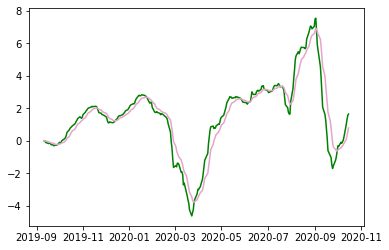

In [80]:
df=stocks["AAPL"]
plt.plot( df['macd'], label='AMD MACD', color = 'green')
plt.plot(df['macd_signal'], label='Signal Line', color='#E5A4CB')
plt.show()

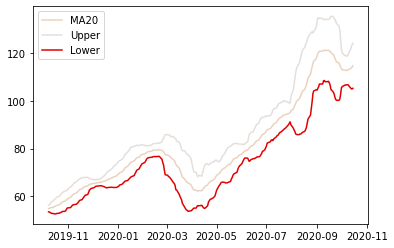

In [81]:
import matplotlib.pyplot as plt
plt.plot( df['MA20'], label='MA20', color = '#EBD2BE')
plt.plot(df['Upper'], label='Upper', color='#E5DFDB')
plt.plot(df['Lower'], label='Lower', color='#E00000')
plt.legend(loc='upper left')
plt.show()

In [69]:
# def add10QSentiment(stocks, current_date, start_date):
#     for stock in tickers: 
#         print(stock)
#         dl.get("10-Q", stock, after_date=start_date.strftime("%Y%M%d"), before_date=current_date.strftime("%Y%M%d"))
# add10QSentiment(stocks,current_date,start_date)

NameError: name 'current_date' is not defined

In [6]:
# import os
# dir = "./edgars/sec_edgar_filings/AAPL/10-Q/"
# directory = os.fsencode("./edgars/sec_edgar_filings/AAPL/10-Q/")
# for file in os.listdir(directory):
#     filename = os.fsdecode(file)
#     if(filename.endswith(".txt") or filename.endswith(".py")):
#         #print(filename)
#         #year = filename[]
#         path = os.path.join(dir, filename)
#         #print(path)
#         text = open(path,'r').read()
#         #print(text[:100])

In [82]:
features = ['High', 'Low', 'Open', 'Close', 'Volume', 'MA20', '20dSTD', 'Upper', 'Lower', 'macd', 'macd_signal', 'RSI']

In [84]:
def lagFeatures(stocks_lagged, features, periods):
    for stock in list(stocks):
        stocks_lagged[stock][features] = stocks_lagged[stock][features].shift(periods)
    return(stocks)
stocks_lagged = lagFeatures(stocks,features,1)

In [85]:
def dict_2_panel(stocks_lagged):  
    df = pd.DataFrame()
    for stock in list(stocks):
        df = df.append(stocks_lagged[stock])
    return df
df = dict_2_panel(stocks_lagged)

In [86]:
df = df.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D3527F6D0>,
      dtype=object)

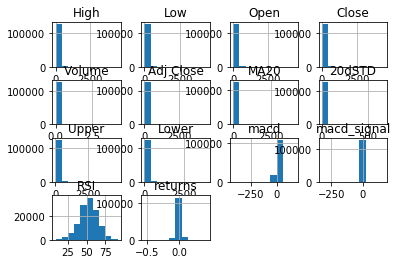

In [87]:
df.hist()

In [89]:
# this cell might need to be run twice
X = pd.DataFrame(df[features])
y = pd.DataFrame(df['returns'])
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()
# print(est2.summary())
p_values = est2.summary2().tables[1]['P>|t|']
coef = est2.summary2().tables[1]['Coef.']

In [90]:
p_dict = {}
coef_dict = {}
for i in range(0,len(features), 1):
    p_dict[features[i]] = p_values[i]
    coef_dict[features[i]] = coef[i]

In [91]:
sig_level = 0.05
p_sig = {k:v for k,v in p_dict.items() if v < sig_level}

In [92]:
# order to sort
p_sort = nsmallest(len(p_dict), p_sig, key = p_dict.get) 

In [93]:
p_sort

['Volume',
 'Open',
 'Close',
 'Low',
 'Lower',
 '20dSTD',
 'RSI',
 'macd_signal',
 'macd',
 'High']

In [95]:
# get most recent value for each stock
def getLastValue(stock_df, factor):
    return(stock_df.tail(n=1)[factor].values[0])

factor = "RSI"
result = {}
for stock in list(stocks):
    result[stock] = getLastValue(stocks[stock], factor)

test = getLastValue(stocks['AAPL'], 'RSI')

In [98]:
def getStockValues(features):
    sorted_stocks = {}
    for factor in features:
        result = {}
        for stock in list(stocks):
            result[stock] = getLastValue(stocks[stock], factor)
        sorted_stocks[factor] = result  
    return sorted_stocks
sorted_stocks = getStockValues(features)

In [122]:
final = ['NVR', 'MTD', 'TDY', 'BIO', 'IPGP', 'TYL', 'MKTX', 'AZO', 'TFX', 'COO', 'ABMD', 'HII', 'GWW', 'AIZ', 'SNA', 'SIVB', 'CMG', 'PAYC', 'BR', 'IDXX', 'BKNG', 'MKC', 'SBAC', 'ESS', 'MSCI', 'ZBRA', 'AVY', 'HUM', 'STE', 'JKHY', 'EFX', 'FRT', 'POOL', 'PKG', 'LH', 'EMN', 'ANSS', 'CINF', 'RMD', 'RE', 'IEX', 'UHS', 'ORLY', 'TDG', 'WRB', 'CTAS', 'SHW', 'FMC', 'MLM', 'MSI', 'GRMN', 'ODFL', 'WLTW', 'PRGO', 'SJM', 'GL', 'ROK', 'VRSN', 'ANET', 'EQIX', 'PH', 'LEG', 'MCO', 'NWS', 'MAA', 'LW', 'WAT', 'CE', 'KSU', 'WHR', 'ULTA', 'ALGN', 'FLT', 'DVA', 'ROL', 'ROP', 'DXCM', 'ITW', 'IT', 'MHK', 'NDAQ', 'DOV', 'WST', 'VRSK', 'HSY', 'FBHS', 'AWK', 'LDOS', 'SNPS', 'HAS', 'AIV', 'XRAY', 'RHI', 'AME', 'ISRG', 'DGX', 'J', 'SWK', 'SEE', 'PSA', 'RJF', 'ECL', 'RSG', 'FFIV', 'ATO', 'JBHT', 'CDW', 'FRC', 'MTB', 'NTRS', 'BLK', 'STZ', 'ALLE', 'ABC', 'TIF', 'WAB', 'GPC', 'EXPD', 'REG', 'LHX', 'PVH', 'HSIC', 'SYK', 'AMP', 'AAP', 'L', 'IQV', 'XYL', 'PNW', 'FLS', 'APD', 'CPRT', 'SPGI', 'ETN', 'ARE', 'CHTR', 'CMI', 'TMO', 'PNR', 'MCK', 'EL', 'ZBH', 'WEC', 'ALB', 'ANTM', 'DPZ', 'BDX', 'EXR', 'IFF', 'INTU', 'LNT', 'CMS', 'NSC', 'CLX', 'TT', 'A', 'DTE', 'VMC', 'SLG', 'FOX', 'PPG', 'FLIR', 'REGN', 'CPB', 'QRVO', 'TER', 'LYV', 'SRE', 'BIIB', 'CHRW', 'BLL', 'NOW', 'CB', 'CTLT', 'BXP', 'WM', 'VRTX', 'AJG', 'CBRE', 'AVB', 'DLR', 'URI', 'KEYS', 'DE', 'ES', 'TRV', 'ED', 'LIN', 'MAS', 'INCY', 'LMT', 'EIX', 'ROST', 'ETR', 'AEE', 'CMA', 'NOC', 'SWKS', 'CERN', 'TTWO', 'CHD', 'RL', 'VAR', 'CME', 'PFG', 'TROW', 'DG', 'PCAR', 'MCHP', 'PRU', 'HCA', 'CTXS', 'K', 'CBOE', 'GPN', 'CAH', 'AKAM', 'AON', 'FTNT', 'DRI', 'UDR', 'YUM', 'HIG', 'ZTS', 'DLTR', 'HWM', 'MMC', 'ZION', 'GD', 'INFO', 'TEL', 'ADSK', 'NEE', 'PEG', 'KLAC', 'CI', 'VNO', 'TSN', 'AOS', 'LRCX', 'HES', 'NWSA', 'PKI', 'ALXN', 'MXIM', 'CCI', 'TAP', 'TSCO', 'APTV', 'UNM', 'LNC', 'LEN']
keep = ['NVR', 'BIO']
sorted_stocks["High"]

{'MMM': 169.4499969482422,
 'ABT': 110.98999786376953,
 'ABBV': 88.80000305175781,
 'ABMD': 280.95001220703125,
 'ACN': 231.89999389648438,
 'ATVI': 82.45999908447266,
 'ADBE': 519.5999755859375,
 'AMD': 86.08999633789062,
 'AAP': 158.0800018310547,
 'AES': 19.610000610351562,
 'AFL': 38.310001373291016,
 'A': 106.01000213623047,
 'APD': 306.82000732421875,
 'AKAM': 115.79000091552734,
 'ALK': 38.650001525878906,
 'ALB': 95.58999633789062,
 'ARE': 168.08999633789062,
 'ALXN': 124.9800033569336,
 'ALGN': 336.260009765625,
 'ALLE': 107.19000244140625,
 'LNT': 54.5,
 'ALL': 94.66000366210938,
 'GOOGL': 1585.1600341796875,
 'GOOG': 1590.0,
 'MO': 40.41999816894531,
 'AMZN': 3492.3798828125,
 'AMCR': 11.470000267028809,
 'AEE': 81.80000305175781,
 'AAL': 12.640000343322754,
 'AEP': 89.95999908447266,
 'AXP': 106.58999633789062,
 'AIG': 30.280000686645508,
 'AMT': 246.5500030517578,
 'AWK': 156.35000610351562,
 'AMP': 171.9499969482422,
 'ABC': 97.55000305175781,
 'AME': 107.94999694824219,


In [126]:
top_p = 0.4
sort_n = 4
remove_list = ['Open', 'Close', 'Volume', 'High', 'Low']

def buyDecision(sorted_stocks, top_p, sort_n, p_sort, remove_list, tickers):
    final = tickers
    p_sort = [i for i in p_sort if i not in remove_list]
    print("Initial length to sort:")
    print(len(final))
    for factor in p_sort[:sort_n]:
        print("For factor {}".format(factor))
        # based on wheter coefficient is pos or neg, then get largest value, or smallest value respectively
#         dict_filter = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])
#         new_dict_keys = (final)
#         buy_order=dict_filter(buy_order, new_dict_keys)
        res = dict(sorted(sorted_stocks[factor].items(), key = itemgetter(1), reverse = (coef_dict[factor] > 0))[:round(len(final)*top_p)]) 
        keep = list(res.keys())
        final = keep
        print("Reduced to length: {}".format(len(final)))
        print("New list: {}".format(final))
        if (len(final) < 5):
            break
    return(final)
    
stocks_to_buy = buyDecision(sorted_stocks, top_p, sort_n, p_sort, remove_list, tickers)

Initial length to sort:
505
For factor Volume
Reduced to length: 202
New list: ['NVR', 'MTD', 'TDY', 'BIO', 'IPGP', 'TYL', 'MKTX', 'AZO', 'TFX', 'COO', 'ABMD', 'HII', 'GWW', 'AIZ', 'SNA', 'SIVB', 'CMG', 'PAYC', 'BR', 'IDXX', 'BKNG', 'MKC', 'SBAC', 'ESS', 'MSCI', 'ZBRA', 'AVY', 'HUM', 'STE', 'JKHY', 'EFX', 'FRT', 'POOL', 'PKG', 'LH', 'EMN', 'ANSS', 'CINF', 'RMD', 'RE', 'IEX', 'UHS', 'ORLY', 'TDG', 'WRB', 'CTAS', 'SHW', 'FMC', 'MLM', 'MSI', 'GRMN', 'ODFL', 'WLTW', 'PRGO', 'SJM', 'GL', 'ROK', 'VRSN', 'ANET', 'EQIX', 'PH', 'LEG', 'MCO', 'NWS', 'MAA', 'LW', 'WAT', 'CE', 'KSU', 'WHR', 'ULTA', 'ALGN', 'FLT', 'DVA', 'ROL', 'ROP', 'DXCM', 'ITW', 'IT', 'MHK', 'NDAQ', 'DOV', 'WST', 'VRSK', 'HSY', 'FBHS', 'AWK', 'LDOS', 'SNPS', 'HAS', 'AIV', 'XRAY', 'RHI', 'AME', 'ISRG', 'DGX', 'J', 'SWK', 'SEE', 'PSA', 'RJF', 'ECL', 'RSG', 'FFIV', 'ATO', 'JBHT', 'CDW', 'FRC', 'MTB', 'NTRS', 'BLK', 'STZ', 'ALLE', 'ABC', 'TIF', 'WAB', 'GPC', 'EXPD', 'REG', 'LHX', 'PVH', 'HSIC', 'SYK', 'AMP', 'AAP', 'L', 'IQV', 'XYL

<ipython-input-126-0e0575cbe29a>:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  res = dict(sorted(sorted_stocks[factor].items(), key = itemgetter(1), reverse = (coef_dict[factor] > 0))[:round(len(final)*top_p)])


In [127]:
stock_weight = 1/len(stocks_to_buy)
weights = [stock_weight if x in stocks_to_buy else 0 for x in tickers]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.07692307692307693,
 0.07692307692307693,
 0,
 0.07692307692307693,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.07692307692307693,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.07692307692307693,
 0,
 0.07692307692307693,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.07692307692307693,
 0,
 0.07692307692307693,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.07692307692307693,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0

In [128]:
price_data  = data.DataReader(tickers, 
                    start=convert_time(epoch_time - (days_back * day_epoch)), 
                    end=convert_time(epoch_time), 
                    data_source='yahoo')

price_data = price_data['Adj Close']

ret_data = price_data.pct_change()[1:]
print(ret_data.head())
weighted_returns = (weights * ret_data)
print(weighted_returns.head())

port_ret = weighted_returns.sum(axis=1)

C:\Users\moyer\anaconda3\envs\birdi\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BRK.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\moyer\anaconda3\envs\birdi\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning: Failed to read symbol: 'BF.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols          MMM       ABT      ABBV      ABMD       ACN      ATVI  \
Date                                                                     
2019-09-12  0.014874  0.008164  0.019283 -0.015963  0.021686  0.009834   
2019-09-13  0.005042 -0.011031 -0.004518 -0.008563 -0.004603  0.009017   
2019-09-16 -0.010324 -0.010799  0.000993  0.022155 -0.002364 -0.003038   
2019-09-17 -0.009430  0.002639  0.014452  0.000000  0.004069 -0.007709   
2019-09-18 -0.003749  0.000718 -0.004609  0.000682 -0.004206 -0.004155   

Symbols         ADBE       AMD       AAP       AES  ...       XRX      XLNX  \
Date                                                ...                       
2019-09-12  0.000864  0.015121 -0.023039  0.007717  ... -0.024336 -0.000190   
2019-09-13  0.001187  0.015889  0.011598  0.007658  ...  0.011487  0.001999   
2019-09-16  0.016454  0.004562 -0.005923  0.013300  ...  0.007787 -0.008077   
2019-09-17  0.006221  0.005190  0.000000 -0.006875  ... -0.010625 -0.001054   
2019-09

In [129]:
port_ret

Date
2019-09-12   -0.002095
2019-09-13    0.000129
2019-09-16    0.000803
2019-09-17   -0.002395
2019-09-18   -0.003257
                ...   
2020-10-09    0.005475
2020-10-12    0.011781
2020-10-13   -0.004822
2020-10-14   -0.005691
2020-10-15   -0.005293
Length: 277, dtype: float64

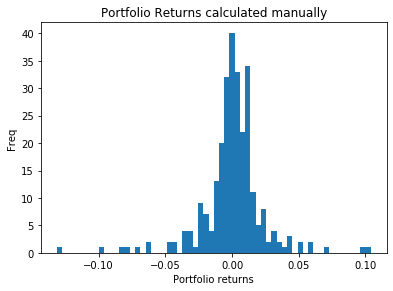

In [131]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret, bins = 60)
ax1.set_xlabel('Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("Portfolio Returns calculated manually")
plt.show(); 

In [132]:
mean_ret = port_ret.mean()
std_returns = port_ret.std()
print(mean_ret)
print(std_returns)

0.0006455153540793194
0.023409904288755355


In [133]:
port_mon = port_ret.resample('M').agg(lambda x: (x + 1).prod() - 1)

In [134]:
def get_fama_french():
    # Web url
    ff_url = "https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip"
    
    # Download the file and save it
    # We will name it fama_french.zip file
    
    urllib.request.urlretrieve(ff_url,'fama_french.zip')
    zip_file = zipfile.ZipFile('fama_french.zip', 'r')
    
    # Next we extact the file data
    
    zip_file.extractall()
    
    # Make sure you close the file after extraction
    
    zip_file.close()
    
    # Now open the CSV file
    
    ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows = 3, index_col = 0)
    # We want to find out the row with NULL value
    # We will skip these rows
    
    #ff_row = ff_factors.isnull().any(1).nonzero()[0][0]
    
    # Read the csv file again with skipped rows
    ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows = 3, nrows = 1130, index_col = 0)
    
    # Format the date index
    ff_factors.index = pd.to_datetime(ff_factors.index, format= '%Y%m')
    
    # Format dates to end of month
    ff_factors.index = ff_factors.index + pd.offsets.MonthEnd()
    
    # Convert from percent to decimal
    ff_factors = ff_factors.apply(lambda x: x/ 100)
    return ff_factors

ff_data = get_fama_french()
ff_features = [ff_data.columns][0]
print(ff_data.tail())

            Mkt-RF     SMB     HML      RF
2020-04-30  0.1365  0.0275 -0.0135  0.0000
2020-05-31  0.0558  0.0247 -0.0495  0.0001
2020-06-30  0.0246  0.0270 -0.0222  0.0001
2020-07-31  0.0577 -0.0222 -0.0132  0.0001
2020-08-31  0.0762 -0.0010 -0.0310  0.0001


In [138]:
ff_data['port'] = port_mon
df = ff_data.dropna()
X = pd.DataFrame(df[ff_features])
y = pd.DataFrame(df['port'])
X2 = sm.add_constant(X)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())
#p_values = est2.summary2().tables[1]['P>|t|']
#coef = est2.summary2().tables[1]['Coef.']

# model = LinearRegression()
# scores = []
# kfold = KFold(n_splits=3, shuffle=True, random_state=42)
# reg = model.fit(X, y)

                            OLS Regression Results                            
Dep. Variable:                   port   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     30.22
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           0.000165
Time:                        09:37:03   Log-Likelihood:                 29.042
No. Observations:                  12   AIC:                            -48.08
Df Residuals:                       7   BIC:                            -45.66
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0077      0.028      0.277      0.7

C:\Users\moyer\anaconda3\envs\birdi\lib\site-packages\scipy\stats\stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
